### IMPORTS

In [95]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
SAVE_PATH = "../saves/"

In [98]:
def get_pareto_old(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [99]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            # Compare the current element with all other elements using broadcasting
            is_dominated = np.all(arr_np[i] <= arr_np, axis=1) & np.any(arr_np[i] < arr_np, axis=1)
            # Update the mask to mark dominated elements as False
            is_pareto_efficient[is_dominated] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient

### Visualization

In [100]:
print(os.listdir(SAVE_PATH))
savefile = os.listdir(SAVE_PATH)[-1]
"Visualizing data from: " + savefile

['pareto.csv', 'saves_1710502540563.csv', 'saves_1710502616293.csv', 'saves_1710502702203.csv', 'saves_1710502795933.csv', 'saves_1710513923401.csv', 'saves_1710514182799.csv', 'saves_1710514219897.csv', 'saves_1710514418808.csv', 'saves_1710514601277.csv', 'saves_1710514689193.csv', 'saves_1710514832352.csv', 'saves_1710515003559.csv', 'saves_1710515295123.csv', 'saves_1710515637176.csv', 'saves_1710519955596.csv']


'Visualizing data from: saves_1710519955596.csv'

In [101]:
# Read CSV
contracts = pd.read_csv(SAVE_PATH+savefile, sep=';')
contracts.drop_duplicates(inplace=True)
print(contracts.shape)
contracts.head()

(2213, 5)


,utilA,utilB,utilSum,contract,pareto
0,3808,6582,10390,"[198,29,90,41,187,79,179,47,26,161,115,152,131...",False
1,3933,6553,10486,"[198,29,90,41,58,79,179,47,26,161,115,152,131,...",False
2,3880,6565,10445,"[198,29,90,41,58,79,179,47,26,161,115,152,131,...",False
3,3891,6561,10452,"[198,29,90,41,58,79,179,47,26,161,115,152,131,...",False
4,3947,6543,10490,"[198,29,90,41,187,179,96,47,26,161,115,152,131...",False


In [104]:
contracts[::-1]

,utilA,utilB,utilSum,contract,pareto
2212,1568,7426,8994,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",NaN
2211,1919,7231,9150,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",NaN
2210,1852,7248,9100,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",NaN
2209,1869,7243,9112,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",NaN
2208,1924,7228,9152,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",NaN


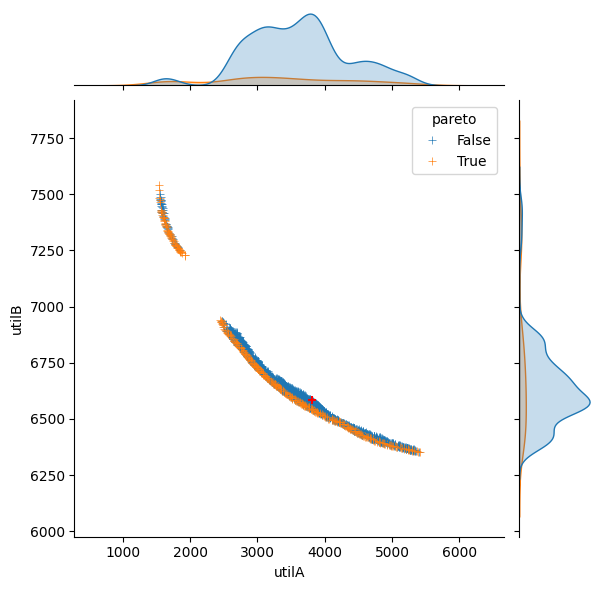

In [111]:
if "pareto" in contracts.columns and np.all(~contracts["pareto"].isna()):
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="pareto", marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red', marker="+")
else:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue=contracts.index, marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red')

In [110]:
# Determine pareto-efficient contracts if necessary
if "pareto" not in contracts.columns or np.any(contracts["pareto"].isna()):
    contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
    contracts = contracts.drop_duplicates()
    contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
contracts

calculating pareto-efficient contracts


,utilA,utilB,utilSum,contract,pareto
0,3808,6582,10390,"[198,29,90,41,187,79,179,47,26,161,115,152,131...",False
1,3933,6553,10486,"[198,29,90,41,58,79,179,47,26,161,115,152,131,...",False
2,3880,6565,10445,"[198,29,90,41,58,79,179,47,26,161,115,152,131,...",False
3,3891,6561,10452,"[198,29,90,41,58,79,179,47,26,161,115,152,131,...",False
4,3947,6543,10490,"[198,29,90,41,187,179,96,47,26,161,115,152,131...",False
...,...,...,...,...,...
2208,1924,7228,9152,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",True
2209,1869,7243,9112,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",True
2210,1852,7248,9100,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",True
2211,1919,7231,9150,"[34,4,109,70,19,87,121,178,127,132,130,84,77,1...",True
